## 1  Preliminaries

In [2]:
# The usual preamble
import pandas as pd
from matplotlib import pyplot as plt
# Make the graphs a bit prettier, and bigger
#pd.set_option('display.mpl_style', 'default') 
#pd.set_option('display.line_width', 5000) 
pd.set_option('display.max_columns', 60) 

#figsize(15, 5)

We're going to use a new dataset here, to demonstrate how to deal with larger datasets. This is a subset of the of 311 service requests from [NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 

In [3]:
import pandas as pd
names2000 = pd.read_csv('names/yob2000.txt',names=['name','sex','births'])

## 2.1 Selecting columns and rows

In next cell, write an expression that returns a `pandas` `Series` with just the names in the `name` column.

In [ ]:
names2000['name']

In the next cell, write an expression that returns the first 25 rows of the `names2000` dataframe,

In [ ]:
names2000[:25]

In the next cell write an expression that returns the first 25 row of the `name` column.

In [ ]:
names2000['name'][:25]

## 2.2 Selecting multiple columns

What if we just want to know the gender and the birth counts, but not the name? Pandas makes it really easy to select a subset of the columns: just index with list of columns you want.  Write an expression that that returns a data frame with just the `name` and `sex` columns of the `names2000` dataframe.

In [ ]:
names2000[['name','sex']]

Now write an expression that returns just the first ten rows of the dataframe you returned in the cell above. 

In [ ]:
names2000[['name','sex']][:10]

## Plotting

Write some lines of code that do a barplot of the first fifteen rows of the `names2000` dataframe.  Make sure the `x`-axis shows the name associated with each bar (and not just an arbitrary integer).

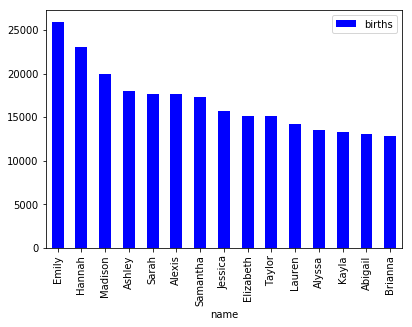

In [4]:
from matplotlib import pyplot as plt
import pandas as pd
names2000 = pd.read_csv('names/yob2000.txt',names=['name','sex','births'],index_col=['name'])
names2000[:15].plot(kind='bar')

In [4]:
True

True

# Aggregation

The following code loads the service requests data used in one of your pandas notebooks, and creates 
a subtable consisting of the data for just three agencies.  It then adds a **new** column called `Count`,
which we're going to use for counting complaints.  Since each row represents exactly one complain,
the value in the `Count` column is always 1.

In [1]:
import pandas as pd
complaints = pd.read_csv('311-service-requests.csv',low_memory=False)
complaints['Count'] = 1

Looking at the `Count` column:

In [2]:
complaints['Count'][:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Count, dtype: int64

The following code creates a subtable with just the complaints for the following three
agencies: `DOT`, `DOP`, and `NYPD`.

In [4]:
pt00 = complaints[complaints.Agency.isin(['DOT', "DOP", 'NYPD'])]

Your mission should you decide to accept it is to create pivot table whose rows are the three agencies,
and whose columns are the complaint types.  Each cell in the table thus contains the total number of complaints
of that complaint type for that agency.  For example, in the NYPD row, the Animal Abuse column should
have the number 164, meaning that 164 animal abuse complaints were made to NYPD.

In [5]:
pt0 = pt00.pivot_table('Count', 'Agency' , columns = 'Complaint Type',
                       aggfunc=sum)

In [6]:
pt0

Complaint Type  Agency Issues  Animal Abuse  Bike Rack Condition  \
Agency                                                             
DOP                       NaN           NaN                  NaN   
DOT                      20.0           NaN                  7.0   
NYPD                      NaN         164.0                  NaN   

Complaint Type  Bike/Roller/Skate Chronic  Blocked Driveway  Bridge Condition  \
Agency                                                                          
DOP                                   NaN               NaN               NaN   
DOT                                   NaN               NaN              20.0   
NYPD                                 32.0            4590.0               NaN   

Complaint Type  Broken Muni Meter  Bus Stop Shelter Placement  Compliment  \
Agency                                                                      
DOP                           NaN                         NaN         NaN   
DOT                        2070.0                        14.0         1.0   
NYPD                          NaN                         NaN         NaN   

Complaint Type  Curb Condition   ...     Street Condition  \
Agency                           ...                        
DOP                        NaN   ...                  NaN   
DOT                       66.0   ...               3473.0   
NYPD                       NaN   ...                  NaN   

Complaint Type  Street Light Condition  Street Sign - Damaged  \
Agency                                                          
DOP                                NaN                    NaN   
DOT                             7117.0                  691.0   
NYPD                               NaN                    NaN   

Complaint Type  Street Sign - Dangling  Street Sign - Missing  Traffic  \
Agency                                                                   
DOP                                NaN                    NaN      NaN   
DOT                              110.0                  327.0      NaN   
NYPD                               NaN                    NaN    168.0   

Complaint Type  Traffic Signal Condition  Tunnel Condition  \
Agency                                                       
DOP                                  NaN               NaN   
DOT                               3145.0               1.0   
NYPD                                 NaN               NaN   

Complaint Type  Urinating in Public  Vending  
Agency                                        
DOP                             NaN      NaN  
DOT                             NaN      NaN  
NYPD                           30.0    229.0  

[3 rows x 46 columns]

In [1]:
pd.pivot??

Object `pd.pivot` not found.


# 4.  Baby names questions

In [1]:
from google.colab import drive
import os.path
import pandas as pd

# Mount google drive to create a filesystem the notebook can use
drive.mount('/content/gdrive') 
# Specify the code dir in the new filesystem.
data_dir ='/content/gdrive/My Drive/'
#file_path = os.path.join(data_dir, 'births_example.csv')
#df.to_csv(file_path,index=False,header=False)

years = list(range(1880,2011))
pieces = []
columns = ['name','sex','births']
    
for year in years:
    path = f'names/yob{year:d}.txt'
    frame = pd.read_csv(path,names=columns)
    frame['year'] = year
    pieces.append(frame)    
    
names = pd.concat(pieces, ignore_index=True)

ModuleNotFoundError: No module named 'google'